In [26]:
import math
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("seaborn")

In [27]:
def B_S_eq(S_0, I, M, T, r, sigma):
    dt = T/M
    S = np.zeros((M+1, I))      # 初期化
    S[0] = S_0
    for i in range(1, M+1):
        S[i] = S[i-1] * np.exp((r - 0.5*sigma**2) *dt + sigma * math.sqrt(dt) * npr.standard_normal(I))
        
    return S

In [36]:
S = B_S_eq(80, 1, 10000, 5.0, 0.00001, 0.001)

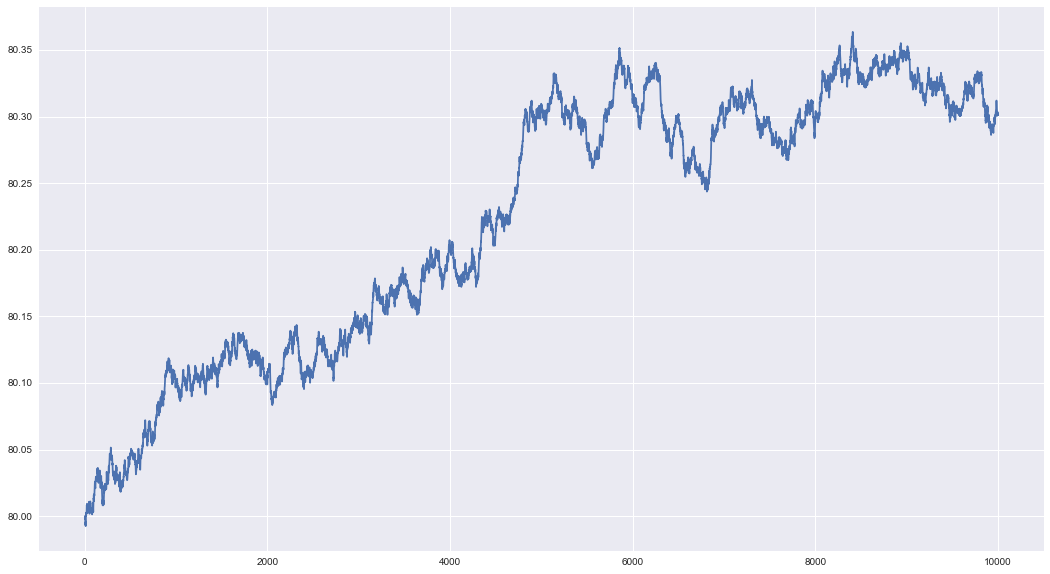

In [37]:
plt.figure(figsize = (18, 10))
plt.plot(S)
plt.show()

In [50]:
S = B_S_eq(100, 1, 100, 2.0, -0.5, 0.1)
S_2 = B_S_eq(100, 1, 100, 2.0, 0.5, 0.1)

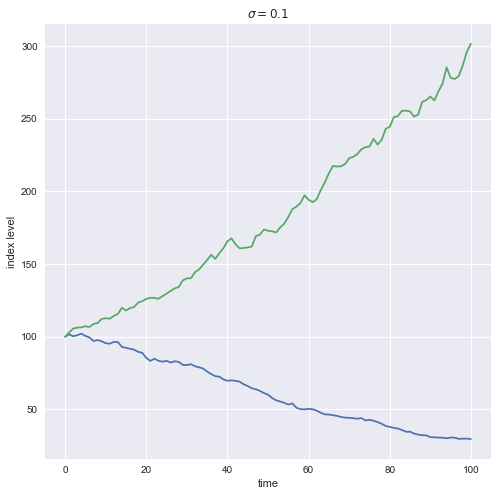

In [54]:
plt.figure(figsize = (8,8))
plt.plot(S)
plt.plot(S_2)
plt.xlabel("time")
plt.ylabel("index level")
plt.title("$ \sigma = 0.1 $")
plt.show()

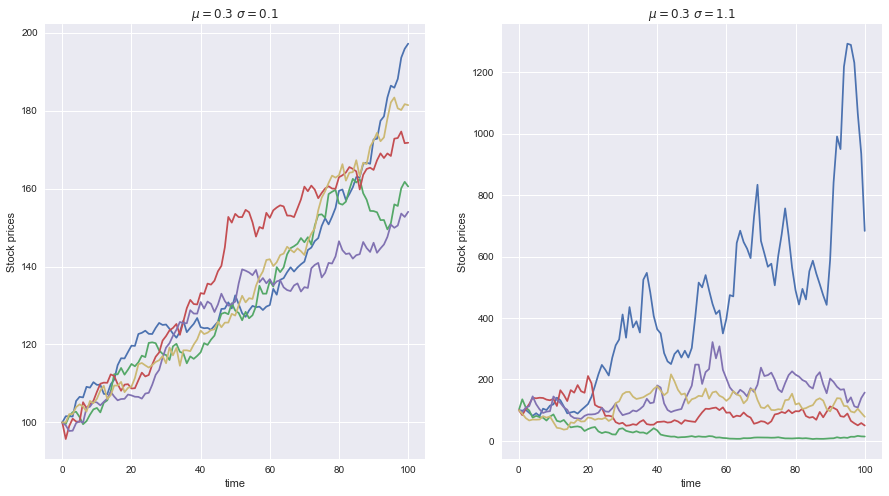

In [63]:
S_3 = B_S_eq(100, 10, 100, 2.0, 0.3, 0.1)
S_4 = B_S_eq(100, 10, 100, 2.0, 0.3, 1.1)
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.plot(S_3[:, :5])
plt.title("$ \mu = 0.3 \  \sigma = 0.1 $")
plt.xlabel("time")
plt.ylabel("Stock prices")

plt.subplot(1,2,2)
plt.plot(S_4[:, :5])
plt.title("$ \mu = 0.3 \ \sigma = 1.1 $")
plt.xlabel("time")
plt.ylabel("Stock prices")
plt.show()

In [11]:
S_0 = 100
mu = 0.05
sigma = 0.05
lamb = 0.75
eta = -0.6
delta = 0.25
mu_j = lamb * (math.exp(eta + 0.5*delta **2) -1)
I = 2
M = 10000
T = 1.0
dt = T/M

S = np.zeros((M+1, I))
S[0] = S_0
sn1 = npr.standard_normal((M+1, I))
sn2 = npr.standard_normal((M+1, I))
poi = npr.poisson(lamb*dt, (M+1, I))
for i in range(1, M+1, 1):
    S[i] = S[i-1] * (np.exp((mu - mu_j - 0.5 * sigma**2) * dt + sigma*math.sqrt(dt) * sn1[i] )+(np.exp(eta + delta * sn2[i] ) -1) *poi[i])
    S[i] = np.maximum(S[i], 0)
                      

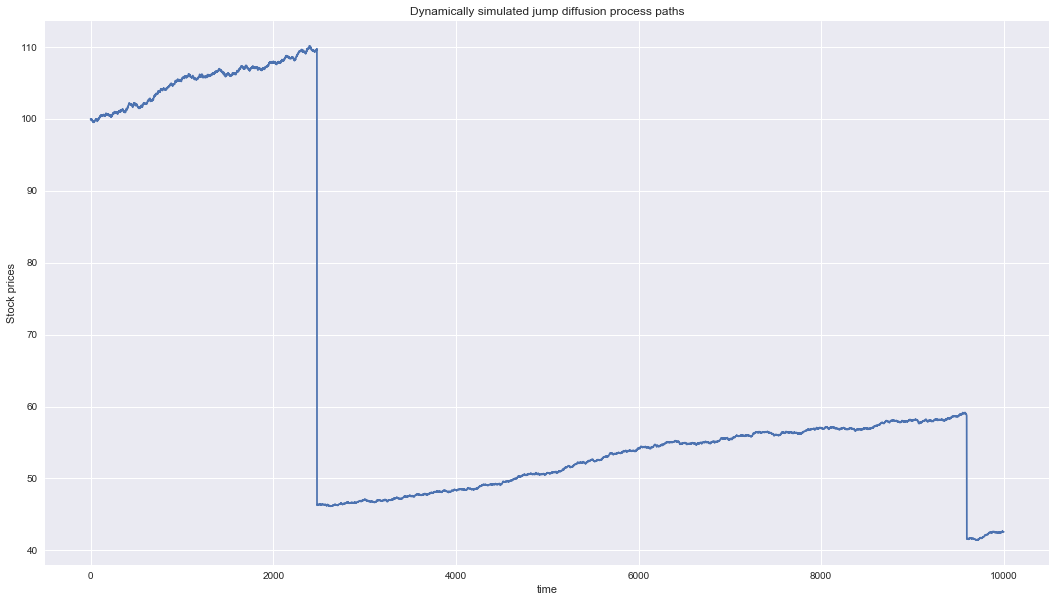

In [12]:
plt.figure(figsize = (18, 10))
plt.plot(S[:, 1])
plt.title("Dynamically simulated jump diffusion process paths")
plt.xlabel("time")
plt.ylabel("Stock prices")
plt.show()

In [23]:
import pandas as pd
pd.DataFrame(S[:, 1], index = 'value')

TypeError: Index(...) must be called with a collection of some kind, 'value' was passed

In [22]:
df_1

NameError: name 'df_1' is not defined

In [28]:
npr.uniform(low = 0, high = 10, size = 100)

array([0.97317346, 0.35740635, 3.29168246, 0.73169272, 3.00426462,
       2.14106228, 0.71226469, 0.8336971 , 3.23612971, 5.0781065 ,
       0.75674208, 0.4294331 , 6.13402118, 2.56956196, 0.48378846,
       4.47750398, 4.07436857, 2.22507439, 0.74362757, 8.01974082,
       3.01412572, 6.2528456 , 4.45706996, 8.67548444, 1.92385447,
       9.55959637, 1.13683977, 5.76189158, 1.60243022, 9.04398295,
       3.77028443, 4.14074987, 1.191712  , 0.51130576, 4.10995794,
       7.4419745 , 5.0802325 , 0.32653142, 7.4665371 , 9.88202109,
       4.38997609, 8.49751221, 0.8271553 , 4.60525691, 4.47960998,
       7.24532735, 1.15318472, 2.07591426, 2.55739407, 2.37146417,
       7.99072067, 0.87842545, 5.28010097, 2.2933465 , 9.11726782,
       9.0999936 , 8.62395452, 1.09792325, 5.76449634, 8.13922592,
       8.94336364, 6.74915543, 6.20162776, 3.83124716, 5.5021619 ,
       7.64080646, 1.48371085, 0.8417905 , 1.68347478, 0.60654189,
       7.60665315, 9.98103417, 5.05588642, 8.5643321 , 5.15000

# モンテカルロ法の例 

In [2]:
import math
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import japanize_matplotlib
%matplotlib inline
plt.style.use("seaborn")

np.random.seed(1)   # 乱数固定

def pi_kinji(n):
    r_x = np.random.uniform(0, 1, n)   # n は乱数の数
    r_y = np.random.uniform(0, 1, n)

    x = np.linspace(0, 1, 500)
    y = np.sqrt(1 - x**2)
    plt.figure(figsize = (8, 8))
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.plot(x, y, 'g')
    plt.plot([0, 1], [1, 1], 'k')
    plt.plot([1, 1], [1, 0], 'k')
    plt.plot([0, 0], [1, 0], 'k')
    plt.plot([0, 1], [0, 0], 'k')
    plt.plot(r_x, r_y, 'r.', alpha = 0.3)
    plt.title(" n = {}".format(n))
    plt.show()
    count_in = 0 # 1/4円内に入っている点の数
    random_point = np.hypot(r_x, r_y)   # sqrt(r_x^2 + r_y^2)を計算している

    for i in random_point:
        if i <= 1:
            count_in += 1

    pi_kinji = 4*count_in/n  # 趣味レーションによるpiの近似値
    
    print("円に入った点の数は{}個です．".format(count_in))
    print("円に入らなかった点の数は{}個です.".format(n - count_in))
    print("シミレーションによる円周率の近似値は{}です．".format(pi_kinji))
    

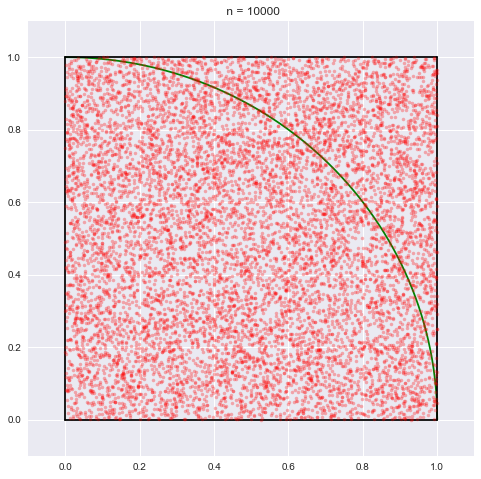

円に入った点の数は7830個です．
円に入らなかった点の数は2170個です.
シミレーションによる円周率の近似値は3.132です．


In [5]:
pi_kinji(10000)

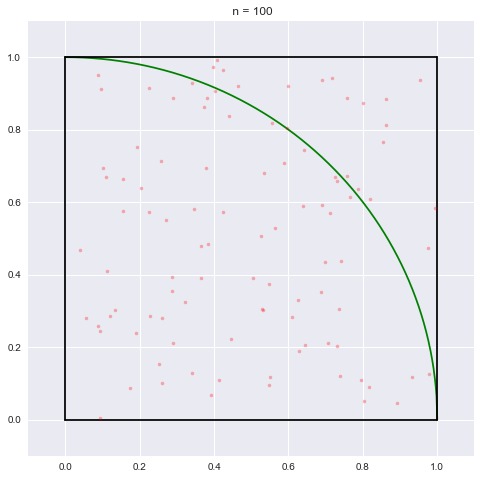

円に入った点の数は81個です．
円に入らなかった点の数は19個です.
シミレーションによる円周率の近似値は3.24です．


In [67]:
pi_kinji(100)

In [66]:
def monte_pi(n):
    random_x = np.random.uniform(0, 1, n)
    random_y = np.random.uniform(0, 1, n)
    random_point = np.hypot(random_x, random_y)    # 原点からの点の位置
    count_in = 0      # 1/4円に入っている点の数
    for i in random_point:
        if i <= 1:
            count_in += 1

    kinji_pi = 4 * count_in/n
    return abs(math.pi - kinji_pi), kinji_pi  # 絶対値誤差 と　近似値


N = 100000
gosa_list = []
kinji_list = []
for i in range(1, N+1):         
    eps, kinji = monte_pi(i)
    gosa_list.append(eps)
    kinji_list.append(kinji)
    

KeyboardInterrupt: 

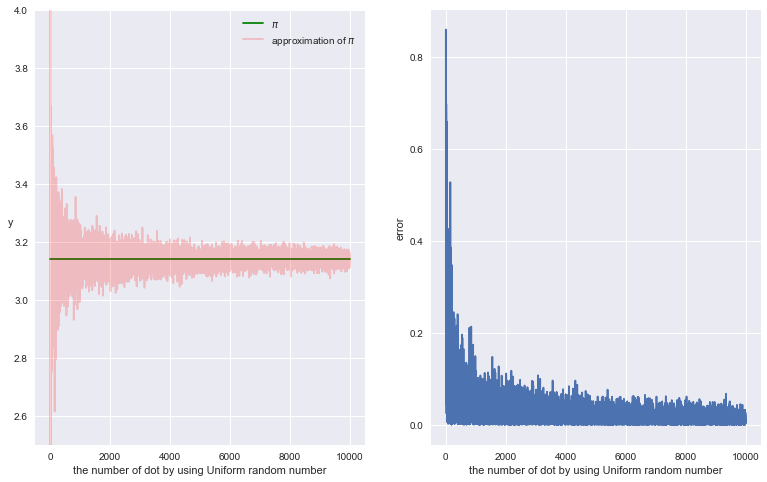

In [24]:
plt.figure(figsize = (13, 8))

plt.subplot(1, 2, 1)
plt.plot([1, N], [math.pi, math.pi], 'g', label = "$\pi$")
plt.plot(kinji_list, 'r', alpha = 0.2, label = "approximation of $\pi$")
plt.xlabel("the number of dot by using Uniform random number")
plt.ylabel("y", rotation = True)
plt.ylim(2.5, 4.0)
plt.legend()

plt.subplot(1, 2, 2)
plt.xlabel("the number of dot by using Uniform random number")
plt.ylabel("error")
plt.plot(gosa_list)
plt.show()

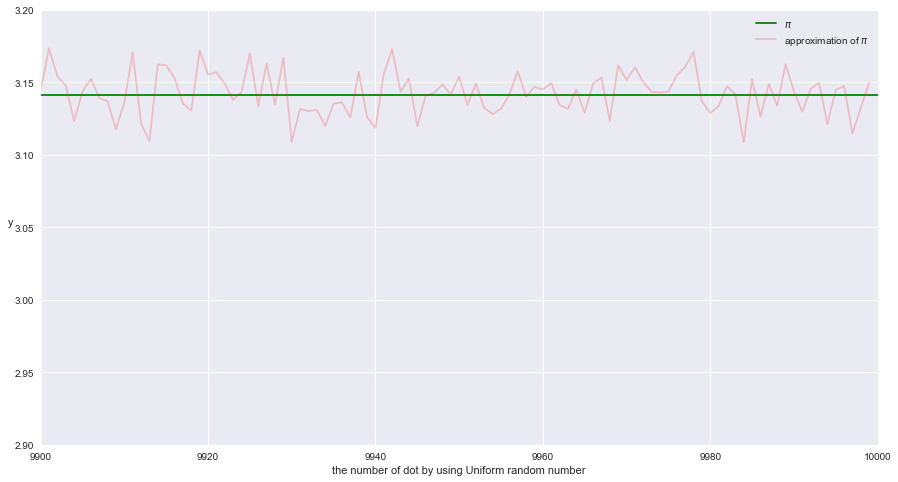

In [18]:
plt.figure(figsize = (15, 8))
plt.plot([1, N], [math.pi, math.pi], 'g', label = "$\pi$")
plt.plot(kinji_list, 'r-', alpha = 0.2, label = "approximation of $\pi$")
plt.xlabel("the number of dot by using Uniform random number")
plt.ylabel("y", rotation = True)
plt.ylim(2.9, 3.2)
plt.xlim(9900, 10000)
plt.legend()
plt.show()

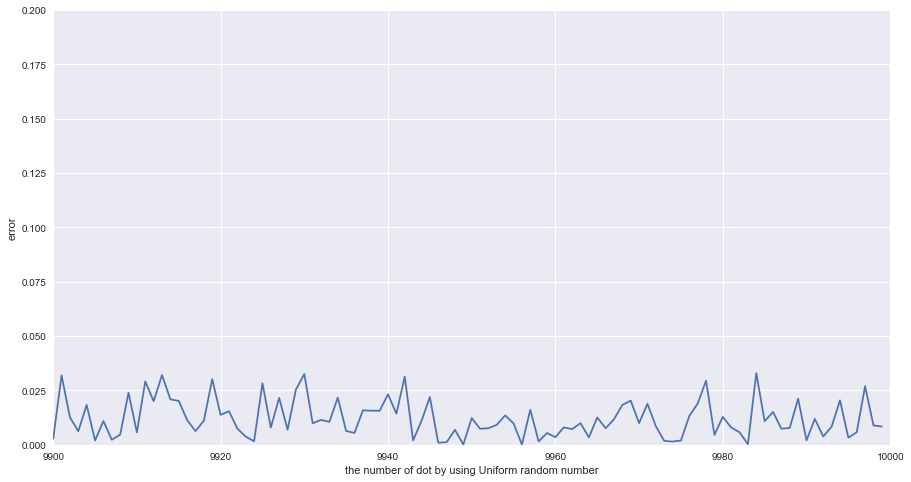

In [19]:
plt.figure(figsize = (15, 8))
plt.xlabel("the number of dot by using Uniform random number")
plt.ylabel("error")
plt.plot(gosa_list)
plt.ylim(0, 0.2)
plt.xlim(9900, 10000)
plt.show()

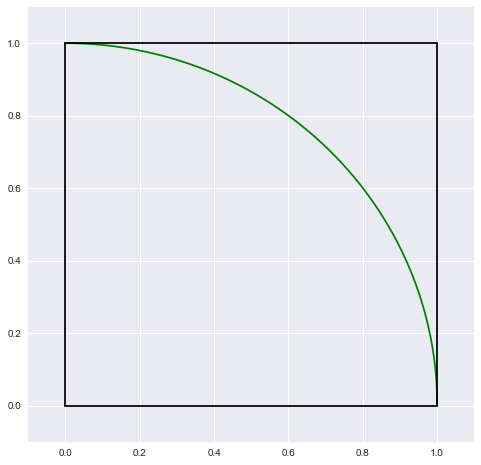

In [59]:
x = np.linspace(0, 1, 500)
y = np.sqrt(1 - x**2)

plt.figure(figsize = (8, 8))
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.plot(x, y, 'g')
plt.plot([0, 1], [1, 1], 'k')
plt.plot([1, 1], [1, 0], 'k')
plt.plot([0, 0], [1, 0], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.show()